In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
def calculate_monte_carlo(no_of_sims,number_of_years,avg_daily_return,std_daily_return,last_prices,weights):
    number_records = 252 * number_of_years
    simulated_price_df = pd.DataFrame()
    portfolio_cumulative_returns = pd.DataFrame()
    for x in range(no_of_sims):

          # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
        simulated_spy_prices = [last_prices[0]]
        simulated_agg_prices = [last_prices[1]]
         # Simulate the returns for 252 * 3 days
        for i in range(number_records):

            # Calculate the simulated price using the last price within the list
            simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return['SPY'], std_daily_return['SPY']))
            simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return['AGG'], std_daily_return['AGG']))

            # Append the simulated price to the list
            simulated_spy_prices.append(simulated_spy_price)
            simulated_agg_prices.append(simulated_agg_price)

        # Append a simulated prices of each simulation to DataFrame
        simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
        simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)

        # Calculate the daily returns of simulated prices
        simulated_daily_returns = simulated_price_df.pct_change()

        # Set the portfolio weights (60% SPY; 40% AGG)
        #weights = [0.4, 0.6]

        # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
        portfolio_daily_returns = simulated_daily_returns.dot(weights)

        # Calculate the normalized, cumulative return series
        portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

    return portfolio_cumulative_returns

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [4]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [5]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE
end_date = datetime.now()
start_date = end_date + timedelta(-365)
closing_prices=get_historical_data(list_of_tickers,start_date,end_date, output_format='pandas')
df=pd.concat([closing_prices['SPY'].sort_values('date'),closing_prices['AGG'].sort_values('date')],join='inner',axis=0,keys=list_of_tickers)

In [6]:
df.drop(columns=['open','high','low','volume'],inplace=True)

In [7]:
#daily_returns=daily_returns.reset_index()
df

close
    date              
SPY 2018-10-01  291.73
    2018-10-02  291.56
    2018-10-03  291.72
    2018-10-04  289.44
    2018-10-05  287.82
...                ...
AGG 2019-09-24  113.28
    2019-09-25  112.81
    2019-09-26  113.00
    2019-09-27  113.14
    2019-09-30  113.17

[502 rows x 1 columns]

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [8]:
# Calculate the daily roi for the stocks
daily_returns = df.groupby(level=0).pct_change()
daily_returns.dropna()


close
    date                
SPY 2018-10-02 -0.000583
    2018-10-03  0.000549
    2018-10-04 -0.007816
    2018-10-05 -0.005597
    2018-10-08  0.000000
...                  ...
AGG 2019-09-24  0.002744
    2019-09-25 -0.004149
    2019-09-26  0.001684
    2019-09-27  0.001239
    2019-09-30  0.000265

[500 rows x 1 columns]

In [9]:
avg_daily_return = daily_returns.groupby(level=0).mean()['close']
avg_daily_return

AGG    0.000293
SPY    0.000125
Name: close, dtype: float64

In [10]:
# Calculate volatility
std_dev_daily_return = daily_returns.groupby(level=0).std()['close']
std_dev_daily_return

AGG    0.001960
SPY    0.010618
Name: close, dtype: float64

In [11]:
# Save the last day's closing price
spy_last_price = df.loc['SPY']['close'][-1]
agg_last_price=df.loc['AGG']['close'][-1]
print(f'spy_last_price {spy_last_price} and agg_last_price {agg_last_price}')

spy_last_price 296.77 and agg_last_price 113.17


In [12]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records=252 * 30
monte_carlo = pd.DataFrame()

In [13]:
# Run the Monte Carlo Simulation
# Set the portfolio weights (60% SPY; 40% AGG)
#weights = [0.4, 0.6]
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()
for x in range(number_simulations):

      # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
     # Simulate the returns for 252 * 3 days
    for i in range(number_records):

        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return['SPY'], std_dev_daily_return['SPY']))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return['AGG'], std_dev_daily_return['AGG']))

        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)

    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)

    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()

    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.6, 0.4]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)

    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
portfolio_cumulative_returns.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
7556,4.496986,3.380716,5.141071,5.766928,4.995594,3.425464,4.883247,8.621081,5.184760,5.833976,...,1.009422,5.513721,2.673643,5.076558,6.530371,7.300822,1.409952,3.970568,9.805849,1.495438
7557,4.486772,3.397534,5.156744,5.758290,4.943550,3.420591,4.848560,8.680336,5.144488,5.823626,...,0.997718,5.508251,2.665055,5.099991,6.523266,7.354398,1.427107,3.969044,9.924935,1.483314
7558,4.458757,3.397402,5.214396,5.759878,4.961358,3.423812,4.861487,8.690517,5.187428,5.793027,...,0.996142,5.542853,2.665141,5.123203,6.568575,7.318605,1.424794,3.934308,10.011333,1.472780
7559,4.447948,3.426096,5.235118,5.763982,4.952423,3.445737,4.859408,8.658104,5.196903,5.761840,...,1.003815,5.572151,2.635408,5.072300,6.578417,7.284459,1.444096,3.927621,10.057092,1.472413
7560,4.437468,3.440503,5.281026,5.764596,4.967523,3.454098,4.852371,8.600851,5.189718,5.757760,...,1.004595,5.609600,2.618794,5.126921,6.582606,7.288159,1.435723,3.888179,9.951780,1.474656


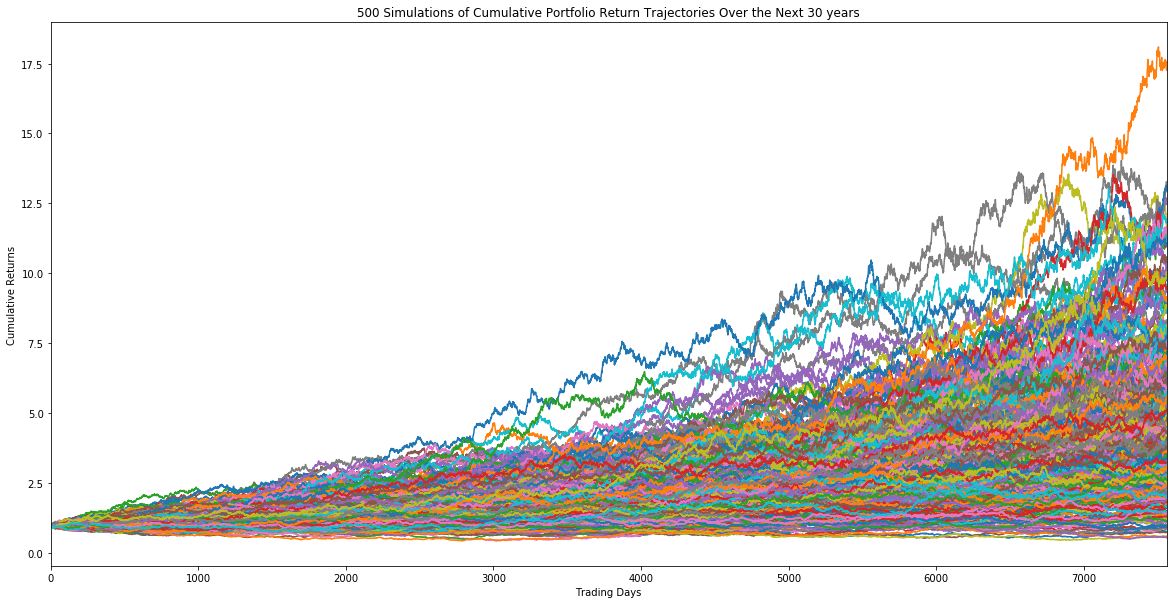

In [14]:
# Visualize the Simulation
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 years"
sim=portfolio_cumulative_returns.plot(figsize=(20,10),legend=None,title=plot_title)
sim.set_xlabel("Trading Days")
sim.set_ylabel("Cumulative Returns")
sim

In [15]:
sim.figure.savefig('monte_carlo_simulation_30_years')

In [16]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns_30=portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns_30.min(),ending_cumulative_returns_30.max()

(0.5636717509299931, 17.258069757031627)

In [17]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
#df=calculate_monte_carlo(500,20,avg_daily_return,std_dev_daily_return,[spy_last_price,agg_last_price],[.4,.6])
#ending_cumulative_returns_20=portfolio_cumulative_returns.iloc[-1, :]
#ending_cumulative_returns_20.head()

In [18]:
# Display the 90% confidence interval for the ending returns
confidence_interval_30=ending_cumulative_returns_30.quantile(q=[0.05,0.95])
confidence_interval_30

0.05    1.382673
0.95    8.790855
Name: 7560, dtype: float64

In [19]:
#confidence_interval_20=ending_cumulative_returns_20.quantile(q=[0.05,0.95])
#confidence_interval_20

In [20]:
#ending_cumulative_returns=pd.concat([ending_cumulative_returns_20,ending_cumulative_returns_30],join='inner',axis=0,keys=['20','30'])
#ending_cumulative_returns

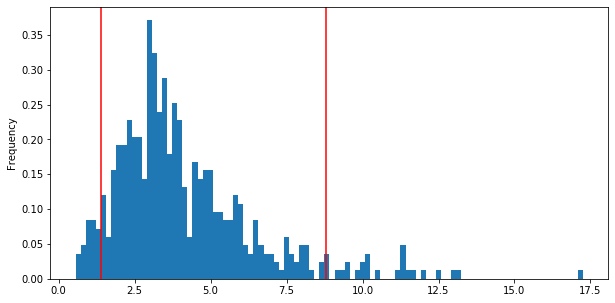

In [21]:
# Visualize the distribution of the ending returns
plt.figure();
dist_90=ending_cumulative_returns_30.plot(kind='hist', density=True, bins=100,figsize=(10,5))
plt.axvline(confidence_interval_30.iloc[0], color='r')
plt.axvline(confidence_interval_30.iloc[1], color='r')
#plt.axvline(confidence_interval_30.iloc[0], color='g')
#plt.axvline(confidence_interval_30.iloc[1], color='g')

In [22]:
dist_90.figure.savefig('90_percent_confidence_interval')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [23]:
expected_cumulative_returns_10_50_90 = ending_cumulative_returns_30.quantile([.1, .5, .90])
expected_cumulative_returns_10_50_90


0.1    1.841174
0.5    3.515970
0.9    7.041018
Name: 7560, dtype: float64

### Given an initial investment of `$50,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [24]:
# YOUR CODE HERE
initial_investment=50000
exptected_portfolio_return=initial_investment * expected_cumulative_returns_10_50_90
exptected_portfolio_return

0.1     92058.690660
0.5    175798.477839
0.9    352050.910515
Name: 7560, dtype: float64

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [25]:
# YOUR CODE HERE
retirement_income = 0.04 * (initial_investment * ending_cumulative_returns_30.quantile([.1]))
retirement_income

0.1    3682.347626
Name: 7560, dtype: float64

In [26]:
print("Since, at 4% withdrawal rate, the 10th percentile retirement income of 3275.44 is less than the projected income of 6,085, it's not definitive whether the portfolio return could meet the annual income requirement")

Since, at 4% withdrawal rate, the 10th percentile retirement income of 3275.44 is less than the projected income of 6,085, it's not definitive whether the portfolio return could meet the annual income requirement


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [30]:
intial_investment_increase=1.5 * initial_investment
retirement_with_increase=0.04 * (intial_investment_increase * ending_cumulative_returns_30.quantile(.1))
retirement_with_increase


5523.521439627516

In [31]:
print("After 50% increase at 4% withdrawal rate, the 10th percentile retirement income of 5523.52 is less than the projected income of 6,085, it's not definitive whether the portfolio return could meet the annual income requirement")

AFter 50% increase at 4% withdrawal rate, the 10th percentile retirement income of 5523.52 is less than the projected income of 6,085, it's not definitive whether the portfolio return could meet the annual income requirement


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 